In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('hmda.csv')

/Users/temp/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,15,16,17,31,32,33,34,44,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns.values

array(['action_taken', 'action_taken_name', 'agency_code', 'agency_abbr',
       'agency_name', 'applicant_ethnicity', 'applicant_ethnicity_name',
       'applicant_income_000s', 'applicant_race_1', 'applicant_race_2',
       'applicant_race_3', 'applicant_race_4', 'applicant_race_5',
       'applicant_race_name_1', 'applicant_race_name_2',
       'applicant_race_name_3', 'applicant_race_name_4',
       'applicant_race_name_5', 'applicant_sex', 'applicant_sex_name',
       'application_date_indicator', 'as_of_year', 'census_tract_number',
       'co_applicant_ethnicity', 'co_applicant_ethnicity_name',
       'co_applicant_race_1', 'co_applicant_race_2', 'co_applicant_race_3',
       'co_applicant_race_4', 'co_applicant_race_5',
       'co_applicant_race_name_1', 'co_applicant_race_name_2',
       'co_applicant_race_name_3', 'co_applicant_race_name_4',
       'co_applicant_race_name_5', 'co_applicant_sex',
       'co_applicant_sex_name', 'county_code', 'county_name',
       'denial_reas

In [122]:
df_filter = [col for col in df if 'name' not in col]

In [124]:
df_filter = df[df_filter]

In [4]:
# df_filter = df[['action_taken','action_taken_name','agency_code','as_of_year','applicant_ethnicity_name',
#        'applicant_income_000s', 'applicant_race_name_1','applicant_sex_name','county_name', 'denial_reason_name_1','denial_reason_name_2','denial_reason_name_3','edit_status_name','owner_occupancy_name', 'preapproval',
#        'preapproval_name', 'property_type', 'property_type_name',
#        'purchaser_type', 'purchaser_type_name', 'respondent_id',
#        'sequence_number', 'state_code', 'state_abbr', 'state_name',
#        'hud_median_family_income', 'loan_amount_000s',
#        'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
#        'minority_population', 'population', 'rate_spread',
#        'tract_to_msamd_income']]

In [193]:
df_filter.shape

(5472489, 37)

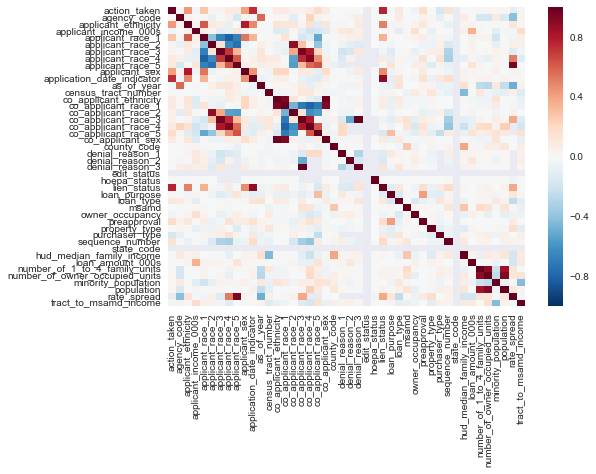

In [126]:
import seaborn as sns
corr = df_filter.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [127]:
df_filter['as_of_year'].unique()

array([2007, 2008, 2011, 2010, 2014, 2009, 2015, 2013, 2012, 2016])

In [128]:
df_2016 = df_filter.loc[df_filter['as_of_year'] == 2016]

In [194]:
df_2016.shape

(519897, 34)

In [130]:
nans = lambda df: df[df.isnull().any(axis=1)]

In [15]:
nans(df_2016)

,action_taken,action_taken_name,agency_code,as_of_year,applicant_ethnicity_name,applicant_income_000s,applicant_race_name_1,applicant_sex_name,county_name,owner_occupancy_name,...,state_abbr,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
77431,1,Loan originated,9,2016,"Information not provided by applicant in mail,...",50.0,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Iredell County,Not owner-occupied as a principal dwelling,...,NC,North Carolina,64100.0,87,1504.0,1011.0,16.370001,4148.0,NaN,119.849998
77506,1,Loan originated,9,2016,Not Hispanic or Latino,75.0,White,Male,Mecklenburg County,Owner-occupied as a principal dwelling,...,NC,North Carolina,64100.0,135,1506.0,1086.0,26.920000,3666.0,NaN,100.839996
77511,1,Loan originated,7,2016,Not Hispanic or Latino,350.0,White,Male,Catawba County,Owner-occupied as a principal dwelling,...,NC,North Carolina,52200.0,280,2407.0,1564.0,25.510000,6421.0,NaN,109.639999
77516,1,Loan originated,9,2016,Not Hispanic or Latino,130.0,White,Male,Union County,Owner-occupied as a principal dwelling,...,NC,North Carolina,64100.0,368,1442.0,1271.0,13.850000,4880.0,NaN,159.470001
77526,3,Application denied by financial institution,9,2016,Not Hispanic or Latino,29.0,Black or African American,Female,Buncombe County,Not owner-occupied as a principal dwelling,...,NC,North Carolina,56200.0,91,1072.0,493.0,61.840000,3291.0,NaN,42.709999
77571,1,Loan originated,7,2016,Not Hispanic or Latino,85.0,Black or African American,Female,Durham County,Owner-occupied as a principal dwelling,...,NC,North Carolina,72100.0,275,1731.0,1338.0,52.990002,5046.0,NaN,140.750000
77621,3,Application denied by financial institution,7,2016,Not Hispanic or Latino,NaN,White,Female,Gaston County,Owner-occupied as a principal dwelling,...,NC,North Carolina,64100.0,77,1504.0,912.0,12.410000,3690.0,NaN,69.370003
77981,1,Loan originated,9,2016,Not Hispanic or Latino,82.0,White,Male,Gaston County,Owner-occupied as a principal dwelling,...,NC,North Carolina,64100.0,219,1633.0,1156.0,5.940000,4126.0,NaN,90.019997
78086,1,Loan originated,7,2016,Not Hispanic or Latino,132.0,White,Male,Wake County,Owner-occupied as a principal dwelling,...,NC,North Carolina,76600.0,261,1624.0,1515.0,23.330000,4853.0,NaN,113.120003
78156,4,Application withdrawn by applicant,7,2016,Not Hispanic or Latino,NaN,Black or African American,Male,Durham County,Owner-occupied as a principal dwelling,...,NC,North Carolina,72100.0,172,2512.0,1857.0,70.150002,7123.0,NaN,89.160004


In [195]:
df_2016.dtypes

action_taken                        int64
agency_code                         int64
applicant_ethnicity                 int64
applicant_income_000s             float64
applicant_race_1                    int64
applicant_race_2                  float64
applicant_race_3                  float64
applicant_sex                       int64
as_of_year                          int64
census_tract_number               float64
co_applicant_ethnicity              int64
co_applicant_race_1                 int64
co_applicant_race_2               float64
co_applicant_sex                    int64
county_code                       float64
denial_reason_1                   float64
denial_reason_2                   float64
denial_reason_3                   float64
lien_status                         int64
loan_purpose                        int64
loan_type                           int64
msamd                             float64
owner_occupancy                     int64
preapproval                       

In [132]:
del df_2016['agency_abbr']
del df_2016['respondent_id']
del df_2016['state_abbr']

In [169]:
df_filter['agency_code'].unique()

array([7, 3, 9, 4, 2, 1, 5])

In [196]:
dataset0 = df_2016

In [197]:
df_2016.shape

(519897, 34)

In [199]:
# del dataset0['application_date_indicator']
del dataset0['co_applicant_race_3']
del dataset0['co_applicant_race_4']
del dataset0['hoepa_status']
del dataset0['edit_status']
del dataset0['number_of_1_to_4_family_units']
del dataset0['population']
del dataset0['applicant_race_4']
del dataset0['applicant_race_5']
del dataset0['co_applicant_race_5']

KeyError: 'co_applicant_race_3'

In [200]:
dataset0.shape

(519897, 34)

In [201]:
df_20k = dataset0

In [234]:
df_20k.shape

(519897, 34)

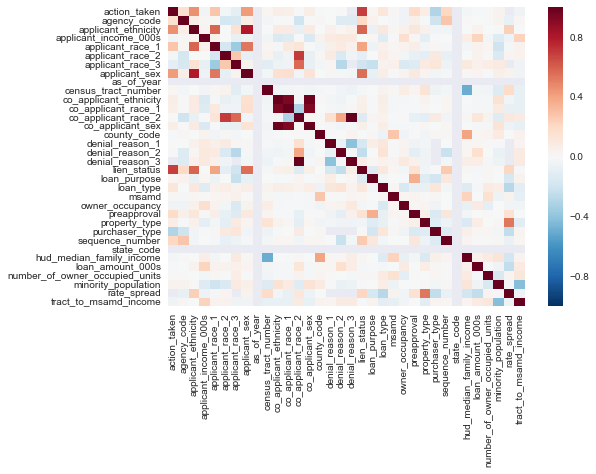

In [203]:
import seaborn as sns
corr = df_20k.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [204]:
import numpy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# dataset = read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
dataset = df_20k.iloc[:,0:29].replace(0, numpy.NaN)
# fill missing values with mean column values
dataset.fillna(dataset.mean(), inplace=True)
# count the number of NaN values in each column
print(dataset.isnull().sum())

action_taken                0
agency_code                 0
applicant_ethnicity         0
applicant_income_000s       0
applicant_race_1            0
applicant_race_2            0
applicant_race_3            0
applicant_sex               0
as_of_year                  0
census_tract_number         0
co_applicant_ethnicity      0
co_applicant_race_1         0
co_applicant_race_2         0
co_applicant_sex            0
county_code                 0
denial_reason_1             0
denial_reason_2             0
denial_reason_3             0
lien_status                 0
loan_purpose                0
loan_type                   0
msamd                       0
owner_occupancy             0
preapproval                 0
property_type               0
purchaser_type              0
sequence_number             0
state_code                  0
hud_median_family_income    0
dtype: int64


In [205]:
dataset.to_csv('dataset.csv')

In [79]:
dataset = pd.read_csv('dataset.csv')

In [208]:
dataset['action_taken'].unique()

array([1, 3, 4, 6, 2, 5, 8, 7])

In [207]:
df['action_taken'].unique()

array([1, 6, 4, 3, 2, 5, 7, 8])

In [209]:
y = dataset['action_taken']
x = dataset.drop(['action_taken'],axis=1)

In [210]:
type(y)

pandas.core.series.Series

In [211]:
type(x)

pandas.core.frame.DataFrame

In [212]:
dataset.dtypes

action_taken                  int64
agency_code                   int64
applicant_ethnicity           int64
applicant_income_000s       float64
applicant_race_1              int64
applicant_race_2            float64
applicant_race_3            float64
applicant_sex                 int64
as_of_year                    int64
census_tract_number         float64
co_applicant_ethnicity        int64
co_applicant_race_1           int64
co_applicant_race_2         float64
co_applicant_sex              int64
county_code                 float64
denial_reason_1             float64
denial_reason_2             float64
denial_reason_3             float64
lien_status                   int64
loan_purpose                  int64
loan_type                     int64
msamd                       float64
owner_occupancy               int64
preapproval                   int64
property_type                 int64
purchaser_type              float64
sequence_number               int64
state_code                  

In [ ]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = regressor.predict(X_test)

In [213]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [214]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = 
train_test_split(x, y, test_size = 0.25, random_state = 0)

In [215]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [216]:
y_pred = classifier.predict(X_test)

In [217]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63975,     0,  1334,     0,     0,   223,     0,     0],
       [ 3900,     0,    80,     0,     0,    30,     0,     0],
       [20263,     0,  2298,     0,     0,   260,     0,     0],
       [13844,     0,   464,     0,     0,    17,     0,     0],
       [ 6751,     0,    29,     0,     0,    23,     0,     0],
       [ 4063,     0,    67,     0,     0, 12350,     0,     0],
       [    1,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     3,     0,     0,     0,     0,     0]])

In [161]:
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

TypeError: unhashable type: 'slice'

In [220]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=False)

78623

In [166]:
# y_pred = classifier.predict(X_train)

In [221]:
accuracy_score(np.array(y_test), np.array(y_pred))

0.60490863627620695

In [ ]:
score()

In [222]:
y_test.shape

(129975,)

In [223]:
y_train.shape

(389922,)

In [225]:
X_test.shape

(129975, 28)

In [226]:
X_train.shape

(389922, 28)

In [228]:
dataset['applicant_sex'].unique()

array([3, 1, 2, 4])

In [237]:
df['property_type'].unique()

array([1, 2, 3])

In [240]:
df['county_name'].unique()

array(['Davidson County', 'Burke County', 'Ashe County', 'Rowan County',
       'Madison County', 'Lee County', 'Alamance County', 'Wake County',
       'Craven County', 'Randolph County', nan, 'Johnston County',
       'Gaston County', 'Caldwell County', 'Guilford County',
       'Mecklenburg County', 'Henderson County', 'Brunswick County',
       'Harnett County', 'McDowell County', 'Orange County',
       'Rutherford County', 'Onslow County', 'Cabarrus County',
       'Franklin County', 'Buncombe County', 'Cumberland County',
       'Sampson County', 'Scotland County', 'New Hanover County',
       'Moore County', 'Iredell County', 'Stanly County',
       'Transylvania County', 'Pitt County', 'Union County',
       'Rockingham County', 'Forsyth County', 'Macon County',
       'Surry County', 'Durham County', 'Person County', 'Swain County',
       'Nash County', 'Vance County', 'Catawba County', 'Warren County',
       'Watauga County', 'Wayne County', 'Washington County',
       'Pe

In [243]:
full_2016 = df.loc[df['as_of_year'] == 2016]

In [244]:
full_2016.shape

(519897, 78)

In [245]:
full_2016.to_csv('full_2016.csv')